In [2]:
%matplotlib inline
import tensorflow as tf
# import tensorflow_addons as tfa
from tensorflow.keras import layers, models, initializers, optimizers
import numpy as np
import matplotlib.pyplot as plt

In [21]:
n_train = 20
n_test = 100 
num_of_features = 200
w_true = tf.ones((num_of_features, 1)) * 0.01
b_true = 0.05

X = tf.random.normal((n_train + n_test, num_of_features))
y = tf.matmul(X, w_true) + b_true + tf.random.normal((X.shape[0], 1), mean=0.01)
X_train, X_test = X[:n_train, :], X[n_train:, :]
y_train, y_test = y[:n_train], y[n_train:]

In [25]:
def init_params():
    w = tf.Variable(tf.random.normal(mean=1, shape=(num_of_features, 1)))
    b = tf.Variable(tf.zeros(shape=(1,)))
    return [w, b]

def l2_penalty(w):
    return tf.reduce_sum((w**2)) / 2

batch_size, num_epochs, lr = 1, 100, 0.003
# net, loss = tf.nn.linreg, tf.losses.MeanSquaredError
# optimizer = tf.keras.optimizers.SGD()
train_iter = tf.data.Dataset.from_tensor_slices(
    (train_features, train_labels)).batch(batch_size).shuffle(batch_size)
loss = tf.losses.MeanSquaredError()

def fit_and_plot_tf2(wd, lr=1e-3):
    net = models.Sequential([
        tf.keras.layers.Dense(1)
    ])
    net.build(input_shape=(1, 200))
    w, b = net.trainable_variables
    optimizer = optimizers.SGD(learning_rate=lr)
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X_cur, y_cur in train_iter:
            with tf.GradientTape() as tape:
                l = loss(net(X_cur), y_cur) + wd * l2_penalty(w)
            grads = tape.gradient(l, net.trainable_variables)
            optimizer.apply_gradients(zip(grads, net.trainable_variables))
        train_ls.append(tf.reduce_mean(loss(net(train_features),
                             train_labels)).numpy())
        test_ls.append(tf.reduce_mean(loss(net(test_features),
                            test_labels)).numpy())
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
                 range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('L2 norm of w:', tf.norm(w).numpy())


In [26]:

def semilogy(x_vals, y_vals, x_label, y_label, 
             x2_vals=None, y2_vals=None,
             legend=None, figsize=(3.5, 2.5)):
    from IPython import display
    display.set_matplotlib_formats('svg')
    plt.rcParams['figure.figsize'] = figsize
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        plt.semilogy(x2_vals, y2_vals, linestyle=':')
        plt.legend(legend)
    plt.show()


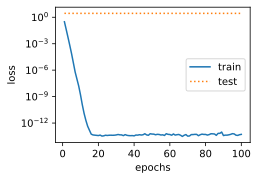

L2 norm of w: 1.3961738


In [27]:
fit_and_plot_tf2(0, lr)
